# **1. Exploratory Data Analysis (EDA):**

Perform exploratory data analysis to understand the structure of the dataset.


In [57]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [59]:
df.isnull().sum()

,0
RI,785
Na,785
Mg,785
Al,785
Si,785
K,785
Ca,785
Ba,785
Fe,785
Type,785


Check for missing values, outliers, inconsistencies in the data.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64


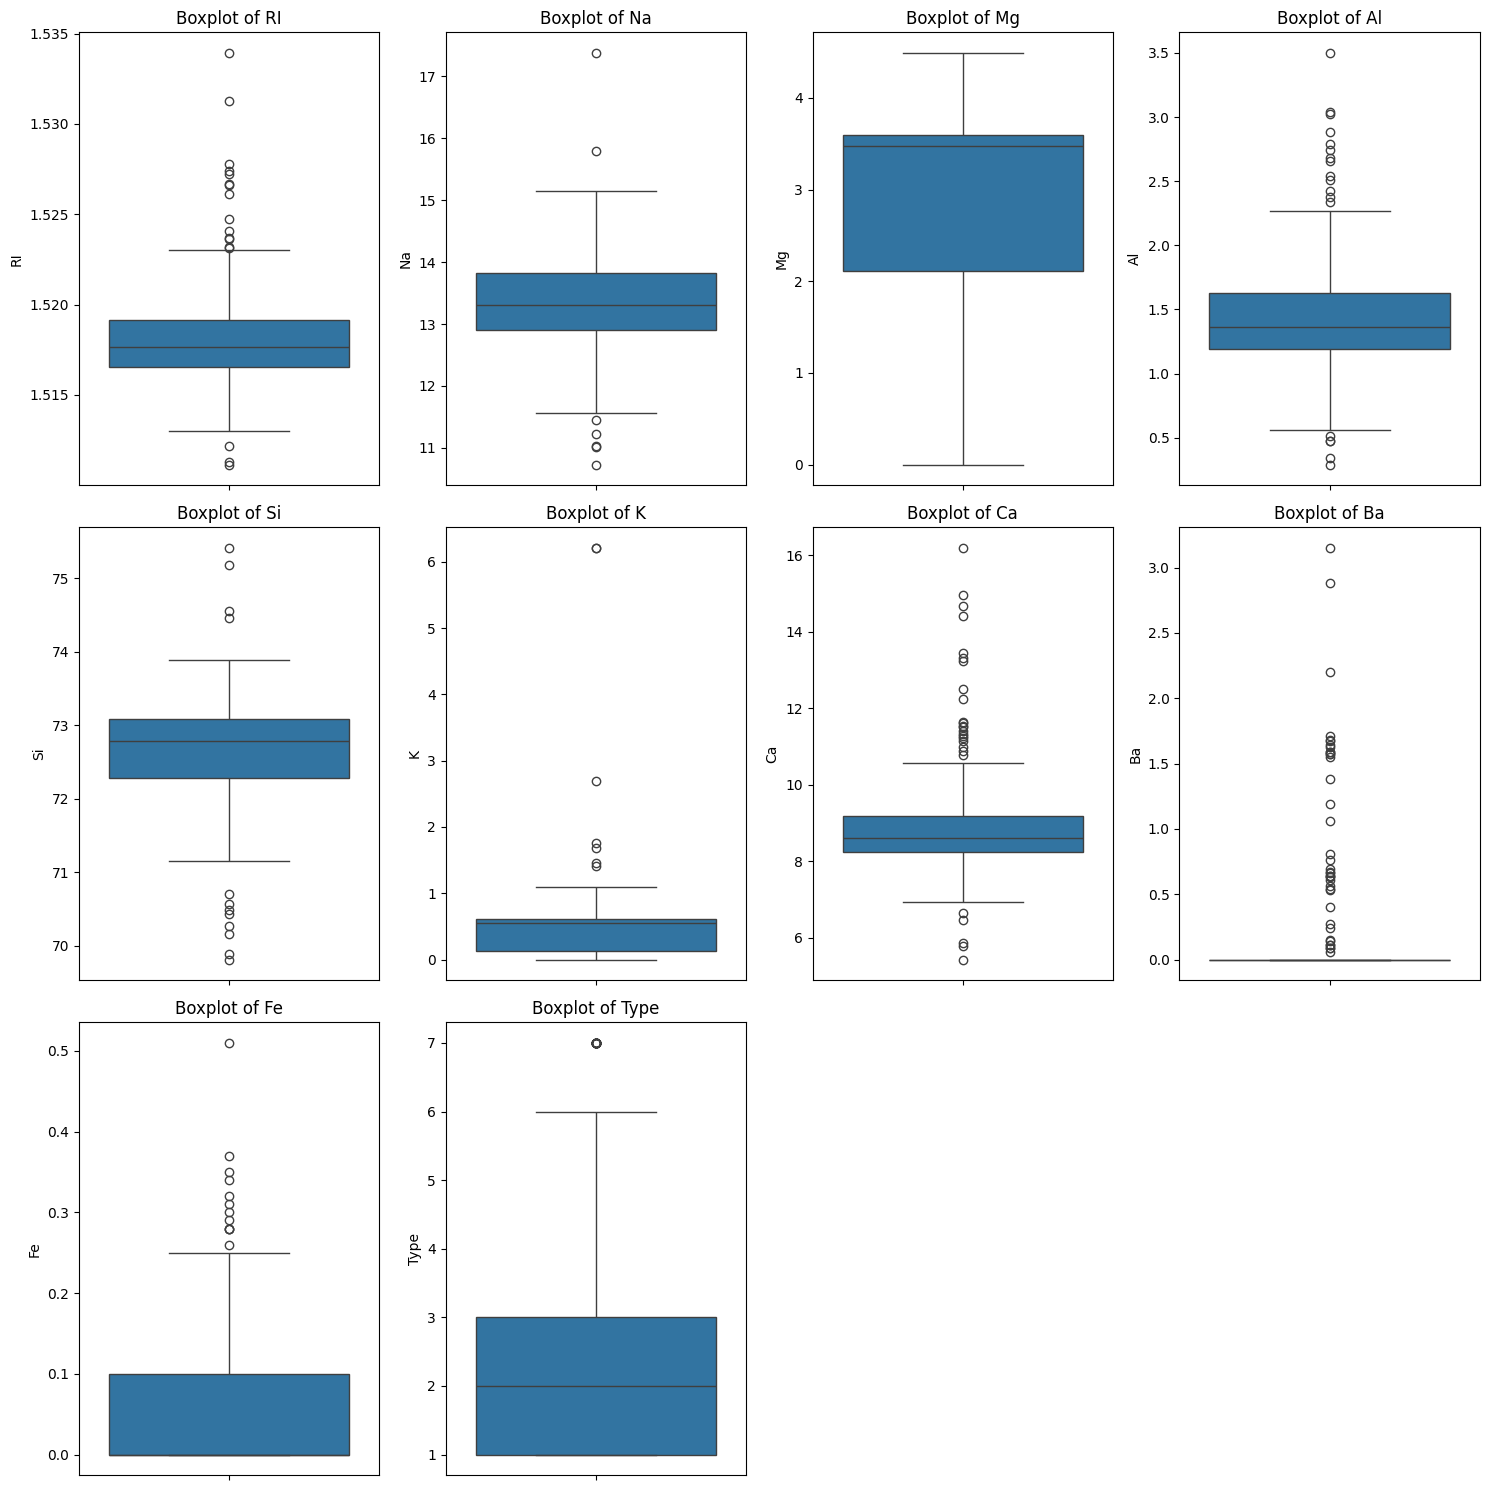

In [61]:
# 2. Detecting Outliers using Box Plots
plt.figure(figsize=(15, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [62]:
# 3. Descriptive statistics to check for inconsistencies
descriptive_stats = df.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)


Descriptive Statistics:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    

In [63]:
# 4. Identifying inconsistent data
# Example: Checking for values that fall outside a reasonable range (based on domain knowledge)
# Here, we'll check for negative or zero values where they are unlikely, like for 'Mg' or 'Ca' (shouldn't be negative).
inconsistent_df = df[(df['Mg'] < 0) | (df['Ca'] < 0)]
print("\nInconsistent Df (Negative or Zero Values):")
print(inconsistent_df)


Inconsistent Df (Negative or Zero Values):
Empty DataFrame
Columns: [RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type]
Index: []


# **2: Data Visualization:**

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

Analyze any patterns or correlations observed in the data.


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

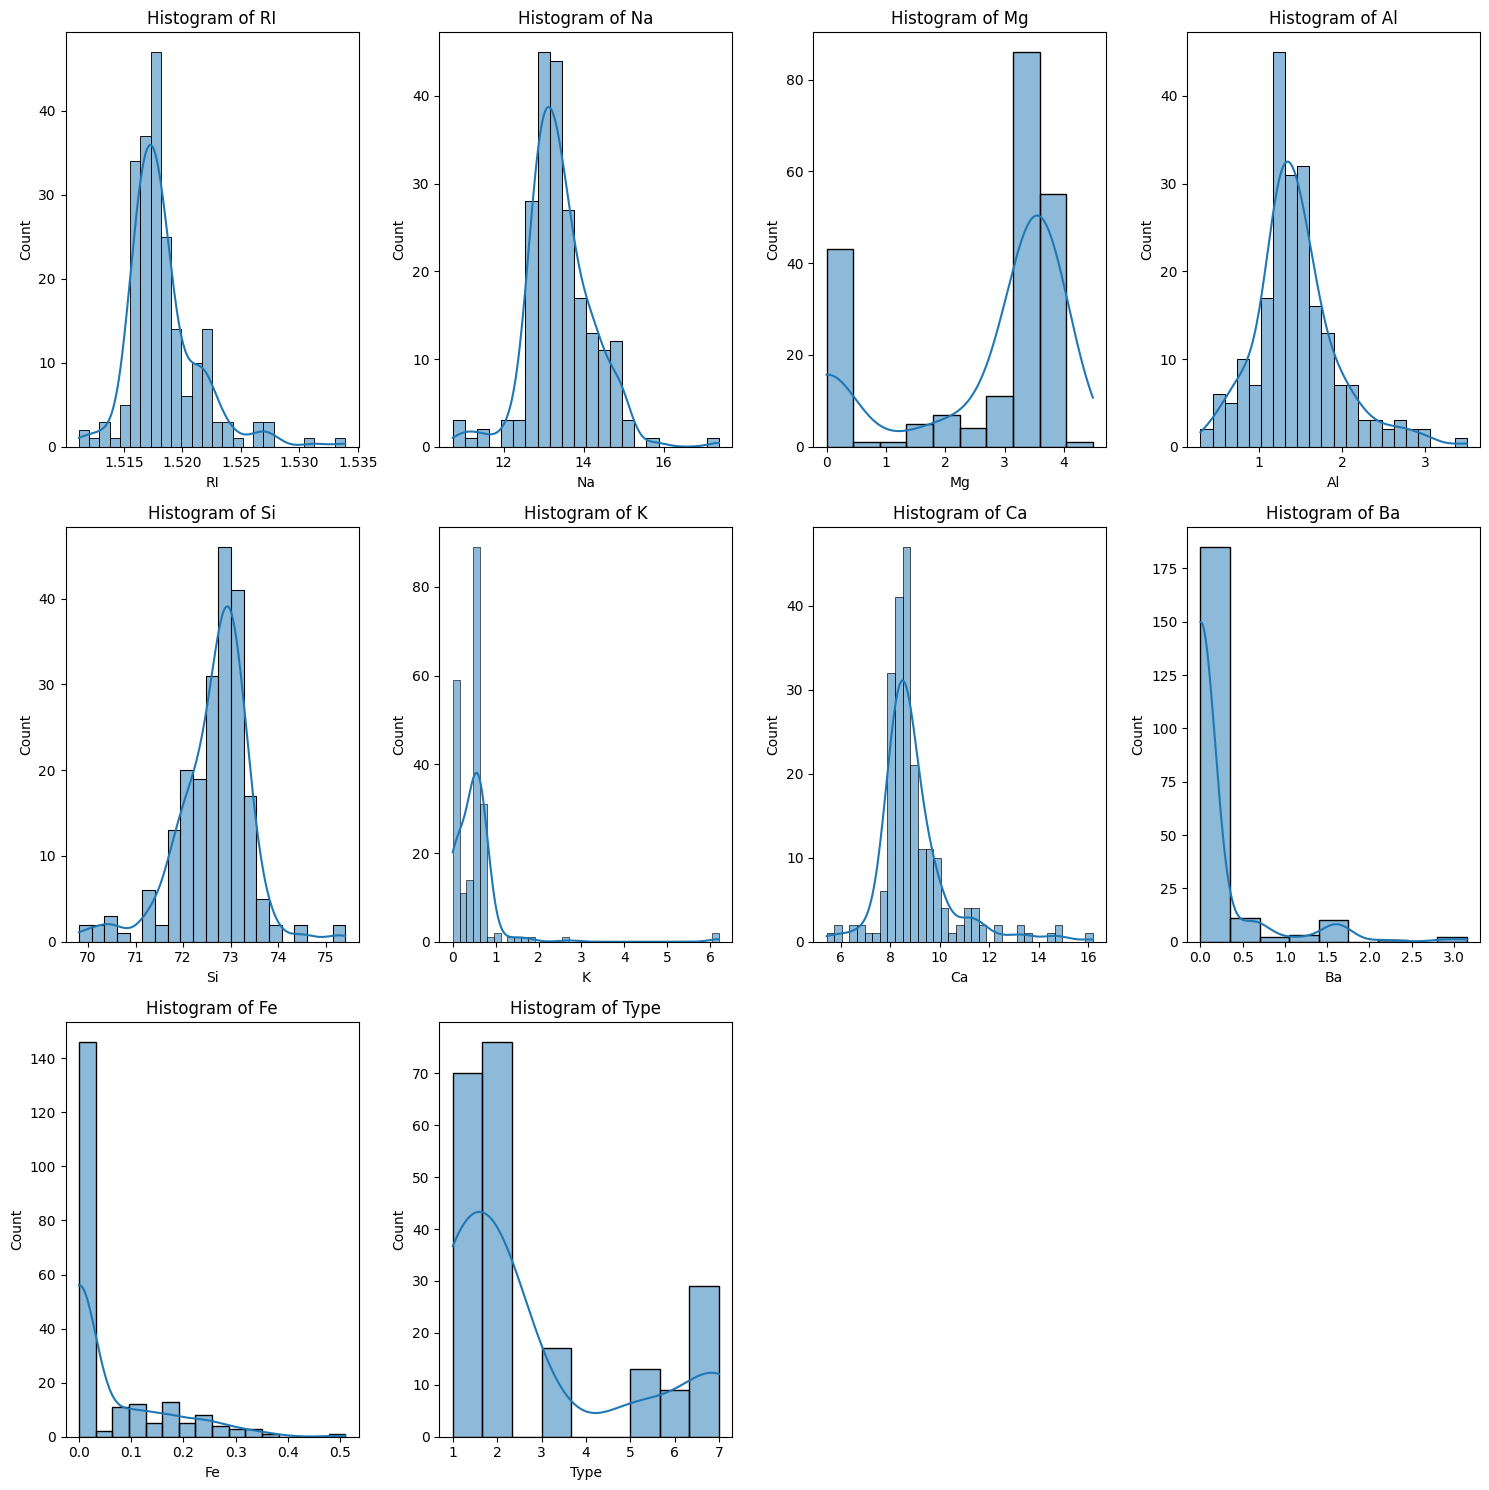

In [65]:
# 1. Histograms for visualizing the distribution of each feature
plt.figure(figsize=(15, 15))

# Assuming df is the DataFrame you want to visualize
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

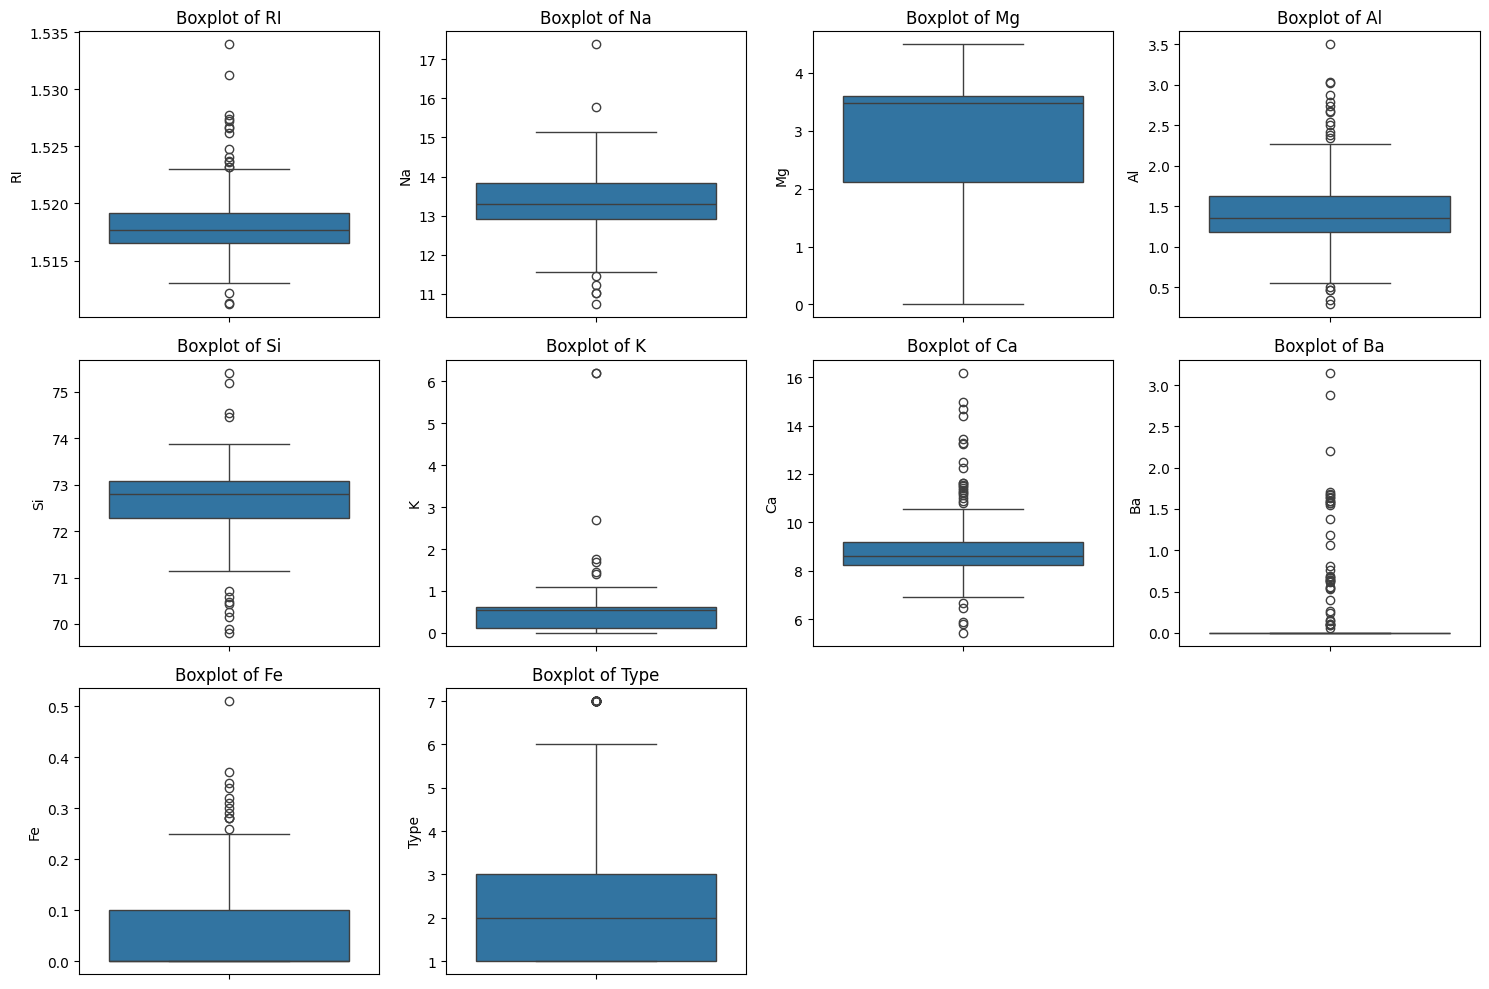

In [66]:
# 2. Box plots to visualize outliers for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1): # Changed df_clean to df
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[column]) # Changed df_clean to df
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

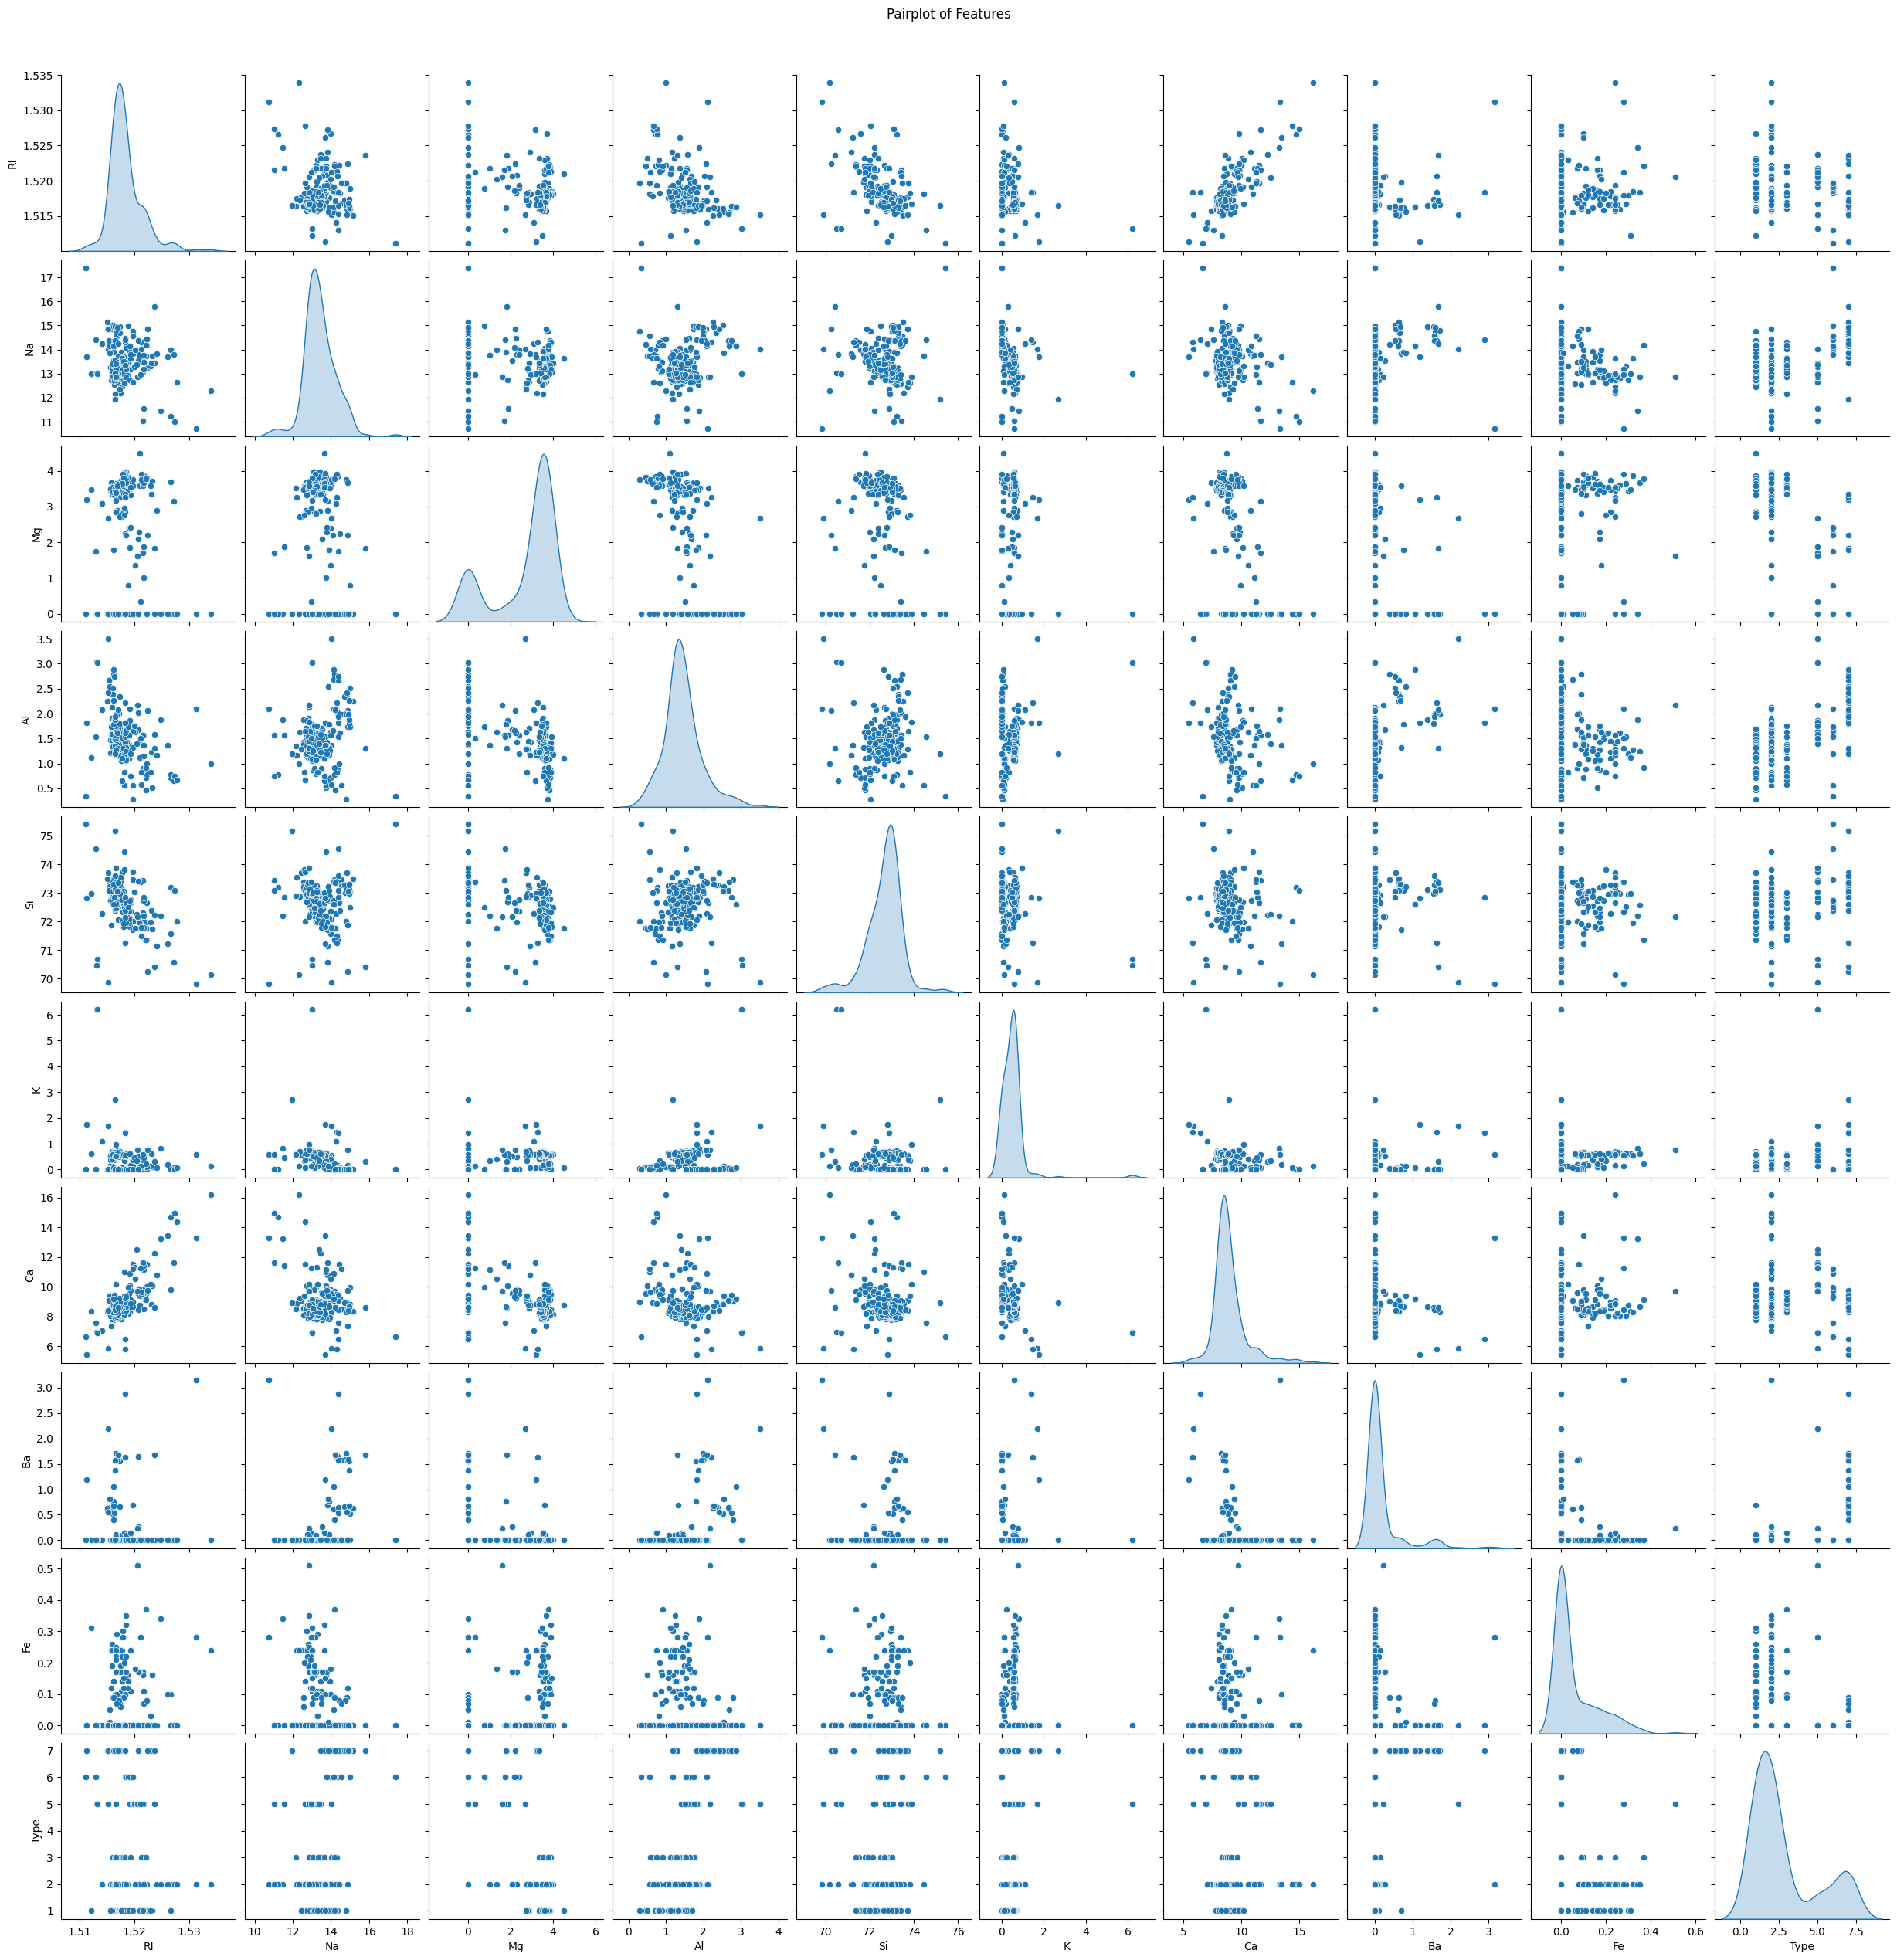

In [67]:
# 3. Pair plot to visualize the relationships between all features
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

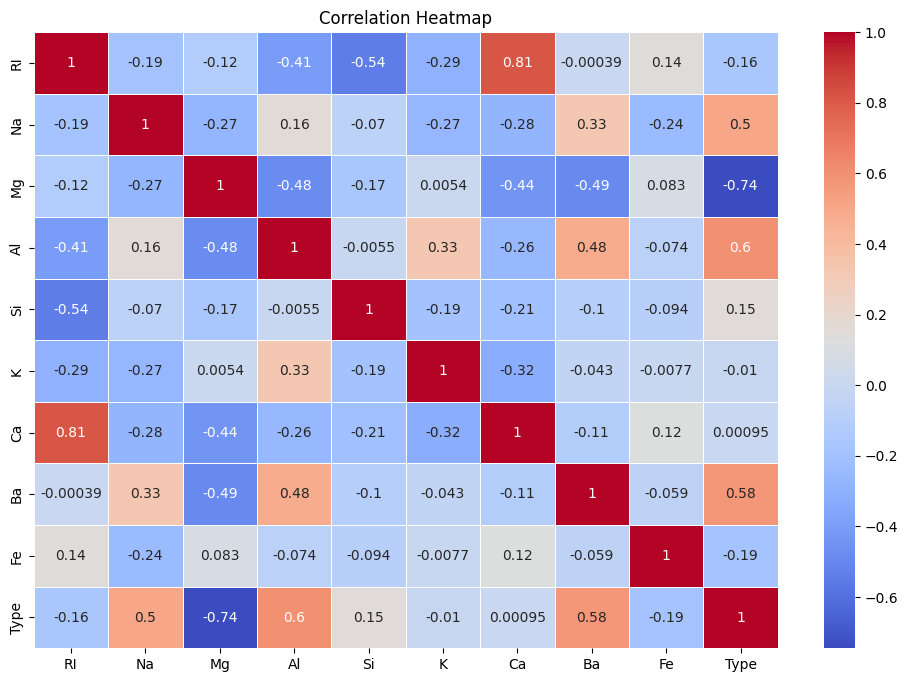

In [68]:
# 4. Correlation heatmap to analyze feature correlations
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# **3: Data Preprocessing**

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.


In [69]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Handling Missing Values
# Use mean imputation to fill missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [70]:
# Verifying that there are no missing values after imputation
missing_values_after = df_imputed.isnull().sum()
print("Missing Values after Imputation:")
print(missing_values_after)

Missing Values after Imputation:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [71]:
# 2. One-hot Encoding (skip since there are no categorical variables)

In [72]:
# 3. Feature Scaling (Standardization)
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)
scaled_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.885924,0.615672,2.710781,-1.496095,-2.435182,-1.451292,-0.314944,-0.762428,-1.26709,-1.832789
1,-0.538712,1.278685,1.374509,-0.368298,0.221071,-0.056637,-1.714947,-0.762428,-1.26709,-1.832789
2,-1.558485,0.323947,1.299438,0.412485,0.948046,-0.355491,-1.791034,-0.762428,-1.26709,-1.832789
3,-0.503055,-0.524709,1.509638,-0.671935,-0.114455,0.242218,-1.121467,-0.762428,-1.26709,-1.832789
4,-0.674206,-0.365586,1.404538,-0.888820,1.199691,0.175806,-1.349729,-0.762428,-1.26709,-1.832789


In [73]:
# 4. Handling Imbalanced Data using SMOTE (Synthetic Minority Over-sampling Technique)
X = scaled_df.drop('Type', axis=1)  # Features
y = scaled_df['Type']  # Target
X,y

(               RI            Na            Mg        Al            Si  \
 0    1.885924e+00  6.156721e-01  2.710781e+00 -1.496095 -2.435182e+00   
 1   -5.387117e-01  1.278685e+00  1.374509e+00 -0.368298  2.210713e-01   
 2   -1.558485e+00  3.239466e-01  1.299438e+00  0.412485  9.480459e-01   
 3   -5.030553e-01 -5.247093e-01  1.509638e+00 -0.671935 -1.144554e-01   
 4   -6.742061e-01 -3.655863e-01  1.404538e+00 -0.888820  1.199691e+00   
 ..            ...           ...           ...       ...           ...   
 994 -1.583463e-13  9.421974e-15  6.667685e-16  0.000000 -3.973434e-14   
 995 -1.583463e-13  9.421974e-15  6.667685e-16  0.000000 -3.973434e-14   
 996 -1.583463e-13  9.421974e-15  6.667685e-16  0.000000 -3.973434e-14   
 997 -1.583463e-13  9.421974e-15  6.667685e-16  0.000000 -3.973434e-14   
 998 -1.583463e-13  9.421974e-15  6.667685e-16  0.000000 -3.973434e-14   
 
                 K            Ca            Ba            Fe  
 0   -1.451292e+00 -3.149438e-01 -7.624283e-01 

In [74]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
pip install imbalanced_learn

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to oversample the minority class
# Ensure y_train is categorical
# Convert y_train to categorical if necessary
# For example, if y_train is continuous, you might use a threshold to binarize it:
threshold = 0.5

In [78]:
from re import X
from imblearn.over_sampling import SMOTE
from collections import Counter

X = df.drop(columns=['Type'])   #'df' is a DataFrame.
y = df['Type']  # Target variable

# Check for missing values in 'y'
if y.isnull().values.any():
  # Handle missing values (e.g., remove rows with missing values or impute them)
  # Remove rows with missing values in 'y'
  df = df.dropna(subset=['Type'])

  # Update X and y after removing missing values
  X = df.drop(columns=['Type'])
  y = df['Type']

# Handling Imbalance with SMOTE.  SMOTE- (Synthetic Minority Over-sampling Technique): Generates synthetic samples for the minority class.
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Original dataset shape: {Counter(y)}")
print(f"Resampled dataset shape: {Counter(y_resampled)}")

#Resampling Techniques:
#Oversampling: Increasing the number of instances in the minority class.
#Undersampling: Reducing the number of instances in the majority class.

Original dataset shape: Counter({2.0: 76, 1.0: 70, 7.0: 29, 3.0: 17, 5.0: 13, 6.0: 9})
Resampled dataset shape: Counter({1.0: 76, 2.0: 76, 3.0: 76, 5.0: 76, 6.0: 76, 7.0: 76})


# **4: Random Forest Model Implementation**
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

In [79]:
from sklearn.model_selection import train_test_split # import train_test_split from the module

x = df.iloc[:,:-1]
y = df['Type']

#Or
#X = df.drop(columns=['Type'])
#y = df['Type']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [80]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()  #Initialize the model.

rfc.fit(xtrain,ytrain)  # Train the model on the training data.

yp = rfc.predict(xtest) # Predictions on the test set.

from sklearn.metrics import classification_report

print(classification_report(ytest,yp))  # Print the classification report for detailed metrics

              precision    recall  f1-score   support

         1.0       0.80      0.84      0.82        19
         2.0       0.73      0.67      0.70        12
         3.0       0.67      0.33      0.44         6
         5.0       0.50      1.00      0.67         1
         6.0       0.50      1.00      0.67         1
         7.0       0.80      1.00      0.89         4

    accuracy                           0.74        43
   macro avg       0.67      0.81      0.70        43
weighted avg       0.75      0.74      0.73        43



In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(ytest, yp)  # Calculate accuracy.

# Calculate precision, recall, and F1-score
precision = precision_score(ytest, yp, average='weighted')
recall = recall_score(ytest, yp, average='weighted')
f1 = f1_score(ytest, yp, average='weighted')

# Print the overall metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 0.74
Precision: 0.75
Recall: 0.74
F1-Score: 0.73


# **5: Bagging and Boosting Methods**
Apply the Bagging and Boosting methods and compare the results.

**Bagging**


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(xtrain, ytrain)

# Make predictions
y_pred_rf = rf_model.predict(xtest)

# Evaluate performance
rf_accuracy = accuracy_score(ytest, y_pred_rf)
rf_precision = precision_score(ytest, y_pred_rf, average='weighted')
rf_recall = recall_score(ytest, y_pred_rf, average='weighted')
rf_f1 = f1_score(ytest, y_pred_rf, average='weighted')

print("Random Forest Performance:")
print(f'Accuracy: {rf_accuracy:.2f}')
print(f'Precision: {rf_precision:.2f}')
print(f'Recall: {rf_recall:.2f}')
print(f'F1-Score: {rf_f1:.2f}')

Random Forest Performance:
Accuracy: 0.74
Precision: 0.73
Recall: 0.74
F1-Score: 0.72


**Boosting**


In [83]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(random_state=42)   # Initialize the model

ada_model.fit(xtrain, ytrain)   # Train the model

# Make predictions
y_pred_ada = ada_model.predict(xtest)

# Evaluate performance
ada_accuracy = accuracy_score(ytest, y_pred_ada)
ada_precision = precision_score(ytest, y_pred_ada, average='weighted')
ada_recall = recall_score(ytest, y_pred_ada, average='weighted')
ada_f1 = f1_score(ytest, y_pred_ada, average='weighted')

print("AdaBoost Performance:")
print(f'Accuracy: {ada_accuracy:.2f}')
print(f'Precision: {ada_precision:.2f}')
print(f'Recall: {ada_recall:.2f}')
print(f'F1-Score: {ada_f1:.2f}')

AdaBoost Performance:
Accuracy: 0.30
Precision: 0.18
Recall: 0.30
F1-Score: 0.19


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Additional Notes:**

**1. Explain Bagging and Boosting methods. How is it different from each other.**

**Bagging (Bootstrap Aggregating):**

Purpose: Reduces variance (prevents overfitting).

How it works: Trains multiple models on different random subsets of the data and averages their predictions.

Example: Random Forest.

**Boosting:**

Purpose: Reduces bias (improves accuracy).

How it works: Trains models sequentially, with each new model focusing on the errors of the previous ones, and combines them by weighting.

Example: AdaBoost, Gradient Boosting.

**Key Difference:**

Bagging builds models independently and combines them to reduce variance.

Boosting builds models sequentially to correct errors and improve accuracy.

**2.Explain how to handle imbalance in the data.**


To handle imbalanced data:

Resampling:

Oversampling: Increase the number of instances in the minority class (e.g., using SMOTE).

Undersampling: Decrease the number of instances in the majority class.

Class Weighting: Adjust the weights of classes in the model to give more importance to the minority class.

Synthetic Data Generation: Create synthetic examples of the minority class to balance the dataset.

Ensemble Methods: Use methods like Balanced Random Forests or EasyEnsemble which handle imbalance through resampling.

Anomaly Detection: Treat the problem as anomaly detection if the minority class is very rare.